## Core concepts

- **Regression:** Regression predicts a continuous number. It gives real values as outcome. Prediction.
- **Classification:** Classification predicts a categorical label. It gives a label as outcome. Yes no values.
- **Target Variable Analysis:** Here we examine the features of a target variable which is dependent in nature. It is necessary because once we have examined what our target variable is like then we can set the other data accordingly to get good results in analysis. It also involved transformation. This step profiles the target variable to align preprocessing, transformation, and modeling strategies for better results
- **Advanced data preprocessing:** It is like data processing, here we apply even more advanced strategies to pre process data.
- **Feature Engineering:** Here we create new features using the pre-existing ones to get better information or underlying information that our data holds.
- **Categorical Encoding:** When we have categorical values in our columns and we change it to numrical ones then it is known as categorical encoding. Binary classification
- **Model Building:** It is the process of training and validating an algorithm with the use dependent and independent variables.
- **Model Evaluation:** Once our model is training then we test our model to evaluate the accuracy of our model, that is known as model evaluation.

## Importing libraries

- **pandas:** used to perform operations on structured data with tables
- **numpy:** used to perform mathematical operations on arrays, matrices
- **matplotlib.pyplot:** used to plotting rows and columns in different kinds of charts (basic)
- **seaborn:** holds a collection of graphs and charts which can plot and visualize data in a better way (advanced) (built on matplotlib)
- **scipy.stats:** provides statistical functions, here **skew** measures asymmetry in data distribution
- **sklearn.model_selection:** **(train_test_split)** splits dataset into training and testing sets for model validation
- **sklearn.preprocessing:** **(StandardScaler, LabelEncoder)** StandardScaler normalizes numeric features to a normal scale, LabelEncoder converts categorical labels to numbers.
- A **Z-score** (or standard score) measures how many standard deviations a data point is away from the mean of a dataset, using the formula: ***z = (data point - mean) / standard deviation***
- **sklearn.linear_model:** **LinearRegression** for linear regresion, linear regression is a machine learning algorithm based on the equation y = mx + c
**sklearn.metrics:** **(mean_squared_error, r2_score, mean_absolute_error)** these are metrics to evaluate a regression model's accuracy and error
**xgboost:** It's an efficient library for powerful machine learning models, often used for structured(tables) data prediction
**os:** provides operating system interaction capabilities.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import os

In [3]:
# setting plot style
sns.set_style('whitegrid')

## Data loading via kaggle

In [4]:
!pip install -q kaggle

- the google.colab import files is used for performing file operations in colab environment
- With the use of os library we used it's function files.upload() to load a file from our storage.

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("\nSucessful")

- mkdir stands for make directory *-p* stands for parents. This creates a hidden directory in user's home directory. The role of -p here is that it allows you to create a full directory path, including paths that don't exist (it makes them if mentioned) so this avoids any kind of error.

- **cp** stands for *copy files/directories* from one location to another. Here we are copying kaggle.json file. It was uploaded above and now we are storing it in our hidden directory that we made using mkdir. **~** represents home directory of current user.

- **chmod** stands for change mode and it is used to change the file permissions.
- 600 is an octal representation of permission settings.
- 6 (first digit) provies read(4) + write(2) = 6 permissions for the owner of the file
- 0 (second digit) no permissions for the group
- 0 (third digit) no permissions for others

This is important because kaggle.json contains important information. So it prevents unauthorized users of processes.

---

Here, you need to ensure that you have joined the competition first.

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

- **-o** stands for overwrite, it overwrites any existing files. If overwrite didn't exist and the file already existed then it would have asked for permission to replace it

In [ ]:
!unzip -o house-prices-advanced-regression-techniques.zip

Machine learning has two types:

1) Supervized: training data and testing data, it will guide the model to learn what is right and wrong, we know what kind of result we want. There are dependent and independent values and the value of dependent value is predicted with the help of independent value.
- Independent values are known as features
- Dependent values are known as labeled data

2) Unsupervized: We don't know our target variable

---

#### Process:
1) Our target variable is sales price
2) We will find the features which will effect the sales price the most, like which has the most influence on it.
3) Data cleaning
4) Data preprocessing
5) Feature Engineering

## Set up for files

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.head(5)

Here we have Id which is counting the number of rows so we don't need an extra index.

In [ ]:
train_df.set_index('Id', inplace=True)
test_df.set_index('Id', inplace=True)

In [ ]:
train_df.head(2)

In [ ]:
print(train_df.shape)
print(test_df.shape)
extra_columns = set(train_df.columns) - set(test_df.columns)
print(extra_columns)

In [ ]:
test_df.head(2)

## EDA on the Target Variable (Sales Price)

In [ ]:
train_df["SalePrice"]

In [ ]:
train_df['SalePrice'].info()

In [ ]:
train_df['SalePrice'].describe()

In [ ]:
plt.figure(figsize=(14,6))

sns.histplot(train_df['SalePrice'], kde=True, bins= 60, color="green")
plt.show()
print(f"Skewness of SalePrice: {train_df['SalePrice'].skew()}")

- There are outliers
- Most sale price are around 140000
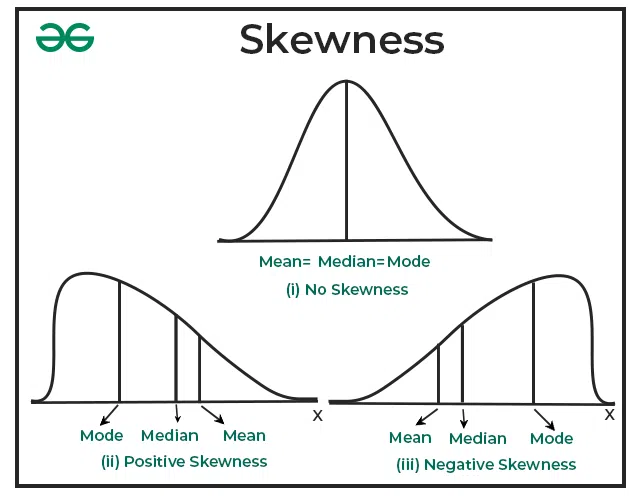
- As we can see, the histogram is positively skewed (right skewed). We have to covert it to almost *no skewness* because it makes it easier to train the model that way.
- A linear model assumes that variables are normally distributed.(Gaussian distribution). Mean = Median = Mode

---

To fix this issue we are going to appy log transformation. How is log transformation going to help here?
Log transformation compresses values, to make them small. It compresses larger values much more than the small ones.
- For example:
- Difference between 10 and 1000 seems huge.
- Difference between log(10) = 2.3 and log(1000)= 6.9 is way too small. This reduction in jump is what helps us to make a more symmetric histogram.
- np.log1p is a NumPy function that calculates the natural logarithm of (1 + x) for each element in the input. np.log1p(x) is implemented to maintain high accuracy, especially when x is near zero.

| Expression                   | Meaning                                                 | Use Case                                      |
|------------------------------|--------------------------------------------------------|-----------------------------------------------|
| (ln(x)\) or `log_e(x)`     | Natural logarithm, base \(e\) (≈2.718)                 | Standard definition in mathematics            |
| (ln(1 + x)\) or `log1p(x)` | Natural log of 1 plus input, i.e., \(\ln(1 + x)\)      | For input data including zeros; numerical stability |


In [ ]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

plt.figure(figsize=(15,7))

sns.histplot(train_df['SalePrice'], kde = True, color = 'green')
plt.show()
print(f"Skewness of SalePrice: {train_df['SalePrice'].skew()}")

The skewness has gone low and the plot is close to a normal distribution. Skewness is close to zero.

## EDA on Feature Engineering

We are going to use a heatmap to find positive correlation.
What is that?
- If two values are increasing or decreasing together then it's positive correlation.
- If one value is going up and the other is going down then it is negative correlation.
We are going to find columns which are influencing the SalePrice the most. (Numeric values only)

---

- **annot = True** means that the cells will show the datavalues, if it was false then the heatmap would have only included colors
- **fmt** stands for format, it specifies string format for annotations (since annot = True)
- **fmt = ".2f"** means that the values will be upto 2 decimal points
- **fmt = 'd'** is used for integer data.
- **vmin** and **vmax** sets the lowest and highest value to start and end color in the colourmap to control appearance and ensure uniformity.

In [ ]:
corrmat = train_df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corrmat, annot=True, fmt=".1f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for all numeric values')
plt.show()

- This is how all the numeric values are correlated with SalePrice.
- I can see that OverallQual, GrLivArea, GarageCars, GarageArea, YearBuilt etc are positively correlated with SalePrice.

---

#### top_corr_features = corrmat.nlargest(10,'SalePrice').index
- Stores index lables of the top ten features correlated with SalePrice
- **corrmat.nlargest(10, 'SalePrice'):** This code is selecting 10 largest values from the column SalePrice in the dataframe corrmat.
- **corrmat.nlargest(10,'SalePrice')['SalePrice']** Selects only SalePrice column
- **.index** extracts index labels for the top 10 features.

#### top_corr_matrix = train_df[top_corr_features].corr()

- **train_df[top_corr_features]:** this part of code train_df is calling columns present in top_corr_features.
- **.corr()** this creats a correlation matrix between the columns selected by train_df[top_corr_features].

In [ ]:
# Let's create a heatmap for the top 10 values.
top_corr_features = corrmat.nlargest(10,'SalePrice').index
print(top_corr_features)
top_corr_matrix = train_df[top_corr_features].corr()
top_corr_matrix

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(top_corr_matrix,annot=True, fmt='.1f', cmap='coolwarm', vmin = -1, vmax=1)
plt.show()

- So now I can see that the values posivtively correlated with SalePrice are OverallQual, GriLiveArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, YearBuilt, YearRemodAdd.
- OverallQual is the most correlated with SalePrice and ('TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd') are least correlated.
- From the most correlated, we can say that, Overall quality, Living area above around and size of garage influences the SalePrice the most.

## Data Preprocessing and Feature Engineering

We have finished analyzing the target variable.
- We transformed it's histplot to a normal distributed plot since linear agression assumes that the plot is normally distributed.
- We learned about the numeric values which influence the SalePrice most.
- Now it's time for handeling missing values and creating new features to prepare the data for modeling.

---

- **.loc** is used to select rows and columns by labels rather than their integer index. **Syntax** -> *df.loc[row_label, column_label]*
- **.iloc** is for indexes
- .loc[] selects columns including 'SaleCondition'
- **train_df.loc[:,:'SaleCondition']**: We are selecting rows and columns upto SaleCondition from train and test data frames.
- SalePrice is the last column in our dataframe and we are excluding it in the variable "all_data".
* We are combining data of train and test together to preprocess all of them together, to ensure consistent transformation in both dataframes.This prevents data leakage and potential issues later.
- first all rows and columns of train_df will be selected and then test_df dataframe.



In [ ]:
all_data = pd.concat((train_df.loc[:,:'SaleCondition'], test_df.loc[:,:'SaleCondition']))
all_data

In [ ]:
print(all_data.shape) #Combined data
print(train_df.shape)
print(test_df.shape)

### Handeling missing data

In [ ]:
missing_data = all_data.isna().sum().sort_values(ascending = False)
print(missing_data)

There are a lot of columns with no missing values, so let's look for columns which have missing values greater than zero

In [ ]:
missing_data = missing_data[missing_data> 0]
print(missing_data)

- **syntax:** DataFrame.select_dtypes(include=None, exclude=None)
- examples for include: number, object, category, np.number, float64, int64
- to select all numberic(integer,float etc.) columns - number or np.number
- to select all catergorical/object columns - ['object', 'category']
- to select all columns except float - exclude = 'float64'
- .columns selects the columns


In [ ]:
numeric_cols = all_data.select_dtypes(include=[np.number]).columns
missing_data_numeric = all_data[numeric_cols].isna().sum()
missing_data_numeric = missing_data_numeric[missing_data_numeric > 0].sort_values(ascending=False)
print(missing_data_numeric)

- Columns which have less number of missing values, we are going to fill it with zero

In [ ]:
missing_data_numeric_zero = ['MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath','BsmtFinSF1','BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageCars','GarageArea']
for cols in missing_data_numeric_zero:
  if cols in all_data.columns:
    all_data[cols] = all_data[cols].fillna(0)


In [ ]:
all_data[['LotFrontage', 'GarageYrBlt']].describe()

In [ ]:
all_data['LotFrontage'].value_counts()

- LotFrontage: Linear feet of street connected to property
- Neighborhood: Physical locations within Ames city limits
- The assumption here is that the Linear feet of street are linked with Neighborhood because every neighborhood follows specific laws, property layouts and planning regulations.

---

- **all_data.groupby('Neighborhood')** groups all unique values present in the Neighborhood column from all_data dataframe. This does not mean that the changes are literally made in the dataframe.

In [ ]:
group = all_data.groupby('Neighborhood')
print(group)

- This output tells us the the groupby function is lazy, here this output is basically representing that the groupby function has created a lazy GroupBy object which knows how to group the rows in the neighborhood column
- The hexadecimal value is the location where this object is stored
- It won't actually group the Neighborhood values until we will provide an aggregation, transformation function or explicitly request grouped data.

---

1) all_data.groupby('Neighborhood') groups all the data under unique values of Neighborhood from all_data dataframe
2) Now 'LotFrontage' values are arranged according to the Neighborhood. It means we are focusing only on the 'LotFrontage' values within each Neighborhood.
3) .agg(['mean', 'median', 'std', 'count']): We are applying multiple aggregation functions to the LotFrontage values in different groups of Neighborhood
4) We are sorting the values according to the median. This helps to quickly identify neighborhoods with smaller or larger median frontage.

In [ ]:
group_stats = all_data.groupby('Neighborhood')['LotFrontage'].agg(['mean', 'median', 'std', 'count']).sort_values('median')
print(group_stats)

We can see the LotFrontage values for each neighborhood.
- Median: For all the Lotfrontage values in a specific neighborhood, it gives us a central idea about those areas. (less affected by outliers)

- std(standard deviation): It tells us about how much variability lies between the values. If std is low then it will mean the values are close. If std is high it means the values are far with a lot of variations.
- count: shows us the number of houses in each neighborhood
- mean: an average, if it's high their might be outliers

**Insight**
1) BrDale has the shortest lot frontage area where as NridgHt has largest lot frontage area
2) The highest number of houses are present in NAmes. It's std is 19 which means the variations of lot frontage values are balanced, not too much and not too less.
3) NoRidge means is 91 and it's median is 89 it means almost all houses in NoRidge have large areas

---

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='LotFrontage', data=all_data)
plt.xticks(rotation=270)
plt.title('LotFrontage Distribution by Neighborhood')
plt.show()

##### How to read a box plot?
- The line in the blue box represents the median. (half homes above and half homes below)
- Blue box represents the middle 50% (from 25th percentile to 75th percentile) and is known as Interquartile range or IQR.
- Whiskers are the lines extending from the box, they show the spread of most of the data (usually upto 1.5 times the IQR above and below the box)
- Circles are *outliers* meaning the values which are much higher or lower than the typical values.

**Insights**
1) Blmngtn, NridgHt, SToneBr, Somerst and Blueste have no outliers. This means that the lotfrontage areas are evenly distributed in these areas.
2) NAmes and Edwards has one very high outlier, it might mean that it is an open field or the person owning that land is very rich to have a area this big.
3) NridgHt has it's median line higher in the box, it means that most of the people have a smaller Lot Frontage.

---

- if LotFrontage is in all_data and if any value in LotFrontage is null
- isnull() returns a series of boolean values where true is for null value and false is for non-null value
- any() checks if there is atleast one value in that series is true
- we are not using isnull() alone because if condition expects one boolean value, not series of them. So any() returns one boolean value.
- here groupby groups all unique values in the Neighborhood and then for each group in Neighborhood, I am calculating LotFrontage values.
- Using the transform function for any value x if it's null then we are filling it with median.
- All this is stored in all_data of 'LotFrontage' value


In [ ]:
# Impute LotFrontage with the median of the neighborhood
if 'LotFrontage' in all_data.columns and all_data['LotFrontage'].isnull().any():
    all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [1]:
print(all_data['LotFronage'])

NameError: name 'all_data' is not defined

- If we explicitly don't set data types then pandas assigns object data type to any column with text or mixed types.
- category is a panda datatype which is set for columns which have a fixed set of values. for example: yes, no or male, female or great,good,bad, worst
- category dtype saves memory and allows for categorical operations
- every categorical data type can be an object datatype but not every object datatype can be categorical datatype.

In [ ]:
categorical_cols = all_data.select_dtypes(include=['object', 'category']).columns
missing_data_categorical = all_data[categorical_cols].isna().sum()
missing_data_categorical = missing_data_categorical[missing_data_categorical > 0].sort_values(ascending=False)
print(missing_data_categorical)